In [37]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(train_image,train_labels),(test_image,test_labels)=mnist.load_data()



In [38]:
train_image=train_image.astype('float32')/255.0
test_image=test_image.astype('float32')/255.0

train_labels=keras.utils.to_categorical(train_labels)
test_labes=keras.utils.to_categorical(test_labels)

train_image=train_image.reshape(-1,28,28,1)
test_image=test_image.reshape(-1,28,28,1)

In [39]:
datagen=ImageDataGenerator(rotation_range=45)
generated_data=datagen.flow(train_image,train_labels,batch_size=1000)


In [40]:
batches=generated_data
batch_0=batches[0]
len(batch_0)

2

In [41]:
len(batch_0[0])

1000

In [42]:
batch_0[0].shape

(1000, 28, 28, 1)

In [43]:
len(batch_0[1])

1000

In [44]:
len(batches)


60

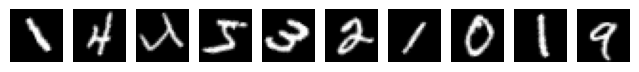

In [45]:
train_image_sample=train_image[0:10]
train_labels_sample=train_labels[0:10]
generated_data_sample=datagen.flow(train_image_sample,train_labels_sample,batch_size=10)
rows=1
columns=10
fig=plt.figure(figsize=(8,8))
for i in range(1,11):
  img=generated_data_sample[0][0][i-1]
  fig.add_subplot(rows,columns,i)
  plt.axis("off")
  plt.imshow(img,cmap="gray")

plt.show()


In [46]:
import numpy as np
concatenated_train_images=np.concatenate((train_image,generated_data[0][0]),axis=0)
concatenated_train_labels=np.concatenate((train_labels, generated_data[0][1]), axis=0)
concatenated_train_images.shape


(61000, 28, 28, 1)

In [47]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu',
                        strides=(1, 1), input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu',strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))





In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(concatenated_train_images, concatenated_train_labels, validation_split=0.1, verbose=1, epochs=3, batch_size=32)



Epoch 1/3
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 97s 55ms/step - accuracy: 0.9104 - loss: 0.2781 - val_accuracy: 0.9657 - val_loss: 0.1210
Epoch 2/3
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9733 - val_loss: 0.1028
Epoch 3/3
1716/1716 ━━━━━━━━━━━━━━━━━━━━ 94s 55ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9679 - val_loss: 0.1249


In [49]:
model.save('mnist_epoch1_61000.h5')
!pwd


/content


In [50]:
loaded_model = keras.models.load_model('mnist_epoch1_61000.h5')
